## Problem 1 - Automated Feature Engineering

### 1. interpretability

Interpretability is the degree to which a human can understand the cause of a decision. Interpretability in machine learning is important for trust and accountability, ensuring users understand model decisions.

Explainability in machine learning means that you can explain what happens in your model from input to output. Model explainability is conducive to diagnosing and correcting errors, complying with regulations, and facilitating stakeholder acceptance by providing transparency about how features influence predictions.

### 2. Feature selection

In [ ]:
!pip install autofeat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 7.1 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
from autofeat import FeatureSelector
import numpy as np
import pandas as pd

# Diabetes dataset
X, y = load_diabetes(return_X_y=True)

# help(FeatureSelector)
'''
 |  fit(self, X: 'np.ndarray | pd.DataFrame', y: 'np.ndarray | pd.DataFrame')
 |      Selects features.
 |
 |      Inputs:
 |          - X: pandas dataframe or numpy array with original features (n_datapoints x n_features)
 |          - y: pandas dataframe or numpy array with targets for all n_datapoints
 |
 |  fit_transform(self, X: 'np.ndarray | pd.DataFrame', y: 'np.ndarray | pd.DataFrame') -> 'np.ndarray | pd.DataFrame'
 |      Selects features and returns only those selected.
 |
 |      Inputs:
 |          - X: pandas dataframe or numpy array with original features (n_datapoints x n_features)
 |          - y: pandas dataframe or numpy array with targets for all n_datapoints
 |      Returns:
 |          - new_X: new pandas dataframe or numpy array with only the good features
 |
 |  transform(self, X: 'np.ndarray | pd.DataFrame') -> 'np.ndarray | pd.DataFrame'
 |      Inputs:
 |          - X: pandas dataframe or numpy array with original features (n_datapoints x n_features)
 |
 |      Returns:
 |          - new_X: new pandas dataframe or numpy array with only the good features
'''

fs = FeatureSelector()
X_new = fs.fit_transform(X, y)

num_original_features = X.shape[1]
num_selected_features = X_new.shape[1]
num_features_discarded = num_original_features - num_selected_features

print(f"Number of original features: {num_original_features}")
print(f"Number of selected features: {num_selected_features}")
print(f"Number of features discarded: {num_features_discarded}")


Number of original features: 10
Number of selected features: 6
Number of features discarded: 4


/usr/local/lib/python3.10/dist-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:


### 3. Train test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

train_r2 = regressor.score(X_train, y_train)
test_r2 = regressor.score(X_test, y_test)

print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Train R2: 0.5539250081377072
Test R2: 0.3322332173106184


### 4. AutoFeatRegressor()

In [ ]:
# help(AutoFeatRegressor)

In [ ]:
from sklearn.datasets import load_diabetes
from autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Same train test as before
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize AutoFeatRegressor with 3 feature engineering steps
auto_feat_regressor = AutoFeatRegressor(verbose=1, feateng_steps=3)
auto_feat_regressor.fit(X_train, y_train)

# Transform both training and test sets to generate new features
X_train_feat = auto_feat_regressor.transform(X_train)
X_test_feat = auto_feat_regressor.transform(X_test)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


[featsel] Scaling data...done.


/usr/local/lib/python3.10/dist-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:


In [ ]:
'''
 |  score(self, X: 'np.ndarray | pd.DataFrame', y: 'np.ndarray | pd.DataFrame') -> 'np.ndarray | pd.DataFrame'
 |      Inputs:
 |          - X: pandas dataframe or numpy array with original features (n_datapoints x n_features)
 |          - y: pandas dataframe or numpy array with the targets for all n_datapoints
 |      Returns:
 |          - R^2/Accuracy returned by prediction_model.score()
'''

train_r2 = auto_feat_regressor.score(X_train_feat, y_train)
test_r2 = auto_feat_regressor.score(X_test_feat, y_test)

print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Train R2: 0.6087
Test R2: 0.3727


In [ ]:
new_features = X_train_feat.columns[:5]

print("First five new features generated by AutoFeatRegressor:")
for feature in new_features:
    print(feature)

First five new features generated by AutoFeatRegressor:
x000
x001
x002
x003
x004


## Problem 2 - Ray Tune for Hyperparameter Optimization

#### Setup

In [ ]:
!pip install "ray[tune]" torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from ray import train, tune
from ray.tune.schedulers import ASHAScheduler

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # In this example, we don't change the model architecture
        # due to simplicity.
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3)
        self.fc = nn.Linear(192, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 3))
        x = x.view(-1, 192)
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

In [ ]:
def train_mnist(config):
    # Setup Data
    mnist_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    train_loader = DataLoader(
        datasets.MNIST("~/data", train=True, download=True, transform=mnist_transforms),
        batch_size=64,
        shuffle=True)
    test_loader = DataLoader(
        datasets.MNIST("~/data", train=False, transform=mnist_transforms),
        batch_size=64,
        shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ConvNet()
    model.to(device)  # Move model to the appropriate device

    optimizer = optim.SGD(model.parameters(), lr=config["lr"], momentum=config["momentum"])

    for i in range(10):  # Assuming 10 epochs or iterations
        train_func(model, optimizer, train_loader, device)  # Pass device here
        acc = test_func(model, test_loader, device)  # Pass device here

        with tempfile.TemporaryDirectory() as temp_checkpoint_dir:
            checkpoint = None
            if (i + 1) % 5 == 0:
                # This saves the model to the trial directory
                torch.save(
                    model.state_dict(),
                    os.path.join(temp_checkpoint_dir, "model.pth")
                )
                checkpoint = Checkpoint.from_directory(temp_checkpoint_dir)

            # Send the current training result back to Tune
            train.report({"mean_accuracy": acc}, checkpoint=checkpoint)


In [ ]:
def train_func(model, optimizer, train_loader, device):
    model.train()
    model.to(device)  # Move model to the appropriate device here
    criterion = nn.CrossEntropyLoss()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

def test_func(model, test_loader, device):
    model.eval()
    model.to(device)
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return 100 * correct / total

# Then modify the main training loop to pass the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Grid search

In [ ]:
import time
from ray import tune


# Start timing
start_time_g = time.time()

# Configuration for grid search
#  for grid search
analysis = tune.run(
    train_mnist,
    metric="mean_accuracy",
    mode="max",
    name="exp",
    stop={
        "mean_accuracy": 0.98,
        "training_iteration": 10
    },
    resources_per_trial={
        "gpu": 1
    },
    config={
        "filters": tune.grid_search([64, 128, 256]),
        "batch_size": tune.grid_search([64, 128, 256]),
        "dropout": tune.uniform(0, 1),
        "lr": tune.uniform(0.001, 0.1),
        "momentum": tune.uniform(0.5, 0.9)  # Adding momentum to the configuration
    }
)

# Stop timing
end_time_g = time.time()

# Calculate elapsed time
elapsed_time_grid_search = end_time_g - start_time_g


+--------------------------------------------------------+
| Configuration for experiment     exp                   |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 9                     |
+--------------------------------------------------------+

View detailed results here: /root/ray_results/exp
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-30_23-55-58_848054_929/artifacts/2024-05-01_00-32-40/exp/driver_artifacts`

Trial status: 9 PENDING
Current time: 2024-05-01 00:32:41. Total running time: 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------+
| Trial name                status       dropout          lr     momentum     filters     batch_size |
+

2024-05-01 00:35:40,547	INFO tune.py:1004 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/exp' in 0.0054s.



Trial train_mnist_51982_00008 finished iteration 1 at 2024-05-01 00:35:40. Total running time: 2min 59s
+-------------------------------------------------+
| Trial train_mnist_51982_00008 result            |
+-------------------------------------------------+
| checkpoint_dir_name                             |
| time_this_iter_s                         15.523 |
| time_total_s                             15.523 |
| training_iteration                            1 |
| mean_accuracy                              96.1 |
+-------------------------------------------------+

Trial train_mnist_51982_00008 completed after 1 iterations at 2024-05-01 00:35:40. Total running time: 2min 59s

Trial status: 9 TERMINATED
Current time: 2024-05-01 00:35:40. Total running time: 2min 59s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
Current best trial: 51982_00002 with mean_accuracy=96.27 and params={'filters': 64, 'batch_size': 256, 'dropout': 0.7673293958610586, 'lr': 0.05245

Best hyperparameters (highest accuracy):

| Trial Name             | Status     | Dropout  | Learning Rate | Momentum | Filters | Batch Size | Accuracy | Iteration | Total Time (s) |
|------------------------|------------|----------|---------------|----------|---------|------------|----------|-----------|----------------|
| train_mnist_51982_00002| TERMINATED | 0.767329 | 0.0524555     | 0.696568 | 256      | 64         | 96.27    | 1         | 15.1884        |



Total running time: 2min 59s = 179s

#### Hyperband

In [ ]:
import time
from ray import tune
from ray.tune.schedulers import HyperBandScheduler

# Start timing
start_time_hb = time.time()

# Correct Hyperband scheduler setup
hyperband = HyperBandScheduler(
    time_attr="training_iteration",  # Attribute to measure time (iteration in this case)
    metric="mean_accuracy",
    mode="max",
    max_t=10  # Maximum number of iterations
)

# Configuration for Hyperband search
analysis = tune.run(
    train_mnist,
    name="exp",
    stop={
        "mean_accuracy": 0.98,
        "training_iteration": 10
    },
    num_samples=20,  # Number of different trials to run
    resources_per_trial={
        "gpu": 1
    },
    config={
        "filters": tune.choice([64, 128, 256]),
        "batch_size": tune.choice([64, 128, 256]),
        "dropout": tune.uniform(0, 1),
        "lr": tune.uniform(0.001, 0.1),
        "momentum": tune.uniform(0.5, 0.9)
    },
    scheduler=hyperband  # Use Hyperband scheduler
)

# Stop timing
end_time_hb = time.time()

# Calculate elapsed time
elapsed_time_hyperband = end_time_hb - start_time_hb

print(f"Elapsed time for Hyperband search: {elapsed_time_hyperband} seconds")


+--------------------------------------------------------+
| Configuration for experiment     exp                   |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        HyperBandScheduler    |
| Number of trials                 20                    |
+--------------------------------------------------------+

View detailed results here: /root/ray_results/exp
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-30_23-55-58_848054_929/artifacts/2024-05-01_00-39-02/exp/driver_artifacts`

Trial status: 20 PENDING
Current time: 2024-05-01 00:39:02. Total running time: 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+------------------------------------------------------------------------------------------------------+
| Trial name                status       filters     batch_size      dropout           lr     momentu

2024-05-01 00:45:47,589	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-05-01 00:45:47,593	INFO tune.py:1004 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/exp' in 0.0082s.



Trial train_mnist_3503a_00019 finished iteration 1 at 2024-05-01 00:45:47. Total running time: 6min 45s
+--------------------------------------------------+
| Trial train_mnist_3503a_00019 result             |
+--------------------------------------------------+
| checkpoint_dir_name                              |
| time_this_iter_s                         15.3864 |
| time_total_s                             15.3864 |
| training_iteration                             1 |
| mean_accuracy                              92.11 |
+--------------------------------------------------+

Trial train_mnist_3503a_00019 completed after 1 iterations at 2024-05-01 00:45:47. Total running time: 6min 45s

Trial status: 20 TERMINATED
Current time: 2024-05-01 00:45:47. Total running time: 6min 45s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------------------------------------

Best hyperparameters (highest accuracy):

| Trial Name               | Status     | Filters | Batch Size | Dropout  | Learning Rate | Momentum | Accuracy | Iteration | Total Time (s) |
|--------------------------|------------|---------|------------|----------|---------------|----------|----------|-----------|----------------|
| train_mnist_3503a_00002  | TERMINATED | 128     | 256        | 0.55999  | 0.0243682     | 0.859634 | 96       | 1         | 15.2066        |

Elapsed time for Hyperband search: 405.15 seconds



#### Bayesian Search



In [ ]:
!pip install bayesian-optimization

In [ ]:
import time
from ray import tune
from ray.tune.search.bayesopt import BayesOptSearch

# Start timing
start_time_bo = time.time()

# Bayesian Optimization setup
bayesopt = BayesOptSearch(
    metric="mean_accuracy",
    mode="max"
)

# Configuration for Bayesian search
analysis = tune.run(
    train_mnist,
    name="exp",
    stop={
        "mean_accuracy": 0.98,
        "training_iteration": 10
    },
    num_samples=20,  # Number of different trials to run
    resources_per_trial={
        "gpu": 1
    },
    config={
        "filters": tune.quniform(64, 256, 64),
        "batch_size": tune.quniform(64, 256, 64),
        "dropout": tune.uniform(0, 1),
        "lr": tune.uniform(0.001, 0.1),
        "momentum": tune.uniform(0.5, 0.9)
    },
    search_alg=bayesopt  # Use Bayesian Optimization search algorithm
)

# Stop timing
end_time_bo = time.time()

# Calculate elapsed time
elapsed_time_bayesian = end_time_bo - start_time_bo

print(f"Elapsed time for Bayesian search: {elapsed_time_bayesian} seconds")


2024-05-01 00:58:34,665	WARNING bayesopt_search.py:421 -- BayesOpt search does not support quantization. Dropped quantization.
2024-05-01 00:58:34,666	WARNING bayesopt_search.py:431 -- BayesOpt does not support specific sampling methods. The Uniform sampler will be dropped.
2024-05-01 00:58:34,667	WARNING bayesopt_search.py:421 -- BayesOpt search does not support quantization. Dropped quantization.
2024-05-01 00:58:34,668	WARNING bayesopt_search.py:431 -- BayesOpt does not support specific sampling methods. The Uniform sampler will be dropped.


+--------------------------------------------------+
| Configuration for experiment     exp             |
+--------------------------------------------------+
| Search algorithm                 SearchGenerator |
| Scheduler                        FIFOScheduler   |
| Number of trials                 20              |
+--------------------------------------------------+

View detailed results here: /root/ray_results/exp
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-04-30_23-55-58_848054_929/artifacts/2024-05-01_00-58-34/exp/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-05-01 00:58:34. Total running time: 0s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+-------------------------------------------------------------------------------------------------+
| Trial name             status       filters     batch_size     dropout          lr     momentum |
+------------------------------------------------

2024-05-01 01:05:17,253	INFO tune.py:1004 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/exp' in 0.0079s.



Trial train_mnist_a7512a06 finished iteration 1 at 2024-05-01 01:05:17. Total running time: 6min 42s
+----------------------------------------------+
| Trial train_mnist_a7512a06 result            |
+----------------------------------------------+
| checkpoint_dir_name                          |
| time_this_iter_s                      15.815 |
| time_total_s                          15.815 |
| training_iteration                         1 |
| mean_accuracy                          93.88 |
+----------------------------------------------+

Trial train_mnist_a7512a06 completed after 1 iterations at 2024-05-01 01:05:17. Total running time: 6min 42s

Trial status: 20 TERMINATED
Current time: 2024-05-01 01:05:17. Total running time: 6min 42s
Logical resource usage: 0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------------------------------------------------------------------------------+
| Trial name             status         f

Best hyperparameters (highest accuracy):

| Trial Name           | Status     | Filters | Batch Size | Dropout  | Learning Rate | Momentum | Accuracy | Iteration | Total Time (s) |
|----------------------|------------|---------|------------|----------|---------------|----------|----------|-----------|----------------|
| train_mnist_8b6afc4b | TERMINATED | 183.879 | 201.664    | 0.0343571| 0.0613502     | 0.665589 | 96.25    | 1         | 15.6672        |


#### Observations

Time taken (low to high): Grid search (179s) < Bayesian (403s) < Hyperband (405s)

Performance (greatest accuracy) (high to low): Grid search (96.27) > Bayesian (96.25) > Hyberband (96)

Overall, grid search with its best hyperparameters is the best model for this dataset


## Problem 3 - Staleness in Asynchronous SGD

g[L1, 1] at second 1: staleness = 0 -- it is the first operation \
g[L1, 2] at second 2: staleness = 1 -- update from g[L1, 1] \
g[L2, 1] at second 2.5: staleness = 2 -- updates from g[L1, 1] and g[L1, 2] \
g[L1, 3] at second 3: staleness = 2 -- updates from g[L2, 1] and  g[L1, 2] \
g[L1, 4] at second 4: staleness = 1 -- update from g[L1, 3] \
g[L2, 1] at second 5: staleness = 2 -- updates from g[L1, 3] and g[L1, 4] \


## Problem 4 - Data Parallelism in Pytorch

#### Setup

In [ ]:
'''ResNet in PyTorch.

For Pre-activation ResNet, see 'preact_resnet.py'.

Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

# test()

#### 1. Different batch sizes

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import time
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from torch.optim import SGD
from torch.nn import DataParallel

def main(batch):
    # Define transformations
    transform_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))
    ])

    transform_test = transforms.Compose([
        transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))
    ])

    # Load datasets
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
    trainloader = DataLoader(trainset, batch_size=batch, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
    testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

    # Create ResNet-18 model and wrap it with DataParallel
    model = resnet18()
    model = DataParallel(model).cuda()  # Ensure that you have CUDA available and GPUs are visible to PyTorch

    # Define optimizer
    optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(2):  # Run for 2 epochs
        if epoch == 1:  # Start timing from the second epoch
            start_time = time.time()

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].cuda(), data[1].cuda()  # Move data to GPU
            optimizer.zero_grad()  # Zero the gradient buffers

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            if epoch == 1 and i == len(trainloader) - 1:  # End timing at the end of the second epoch
                print(f"Time taken for the second epoch: {time.time() - start_time} seconds")

    print('Completed training')


In [ ]:
# Batch sizes increasing by 4 folds
batch = [32, 128, 512, 2048, 8192]

for batch_size in batch:
    if __name__ == '__main__':
        main(batch_size)

Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 22.759968519210815 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 12.768227815628052 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 11.658537149429321 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 11.966640949249268 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 12.918256521224976 seconds
Completed training


Continuinf to increase batch sizes by 4-fold below, the code breaks at batch size = 32768. The successful training times of the trails are shown above.

In [ ]:
batch_size = 32
while True:
    try:
        if __name__ == '__main__':
            main(batch_size)
        batch_size *= 4  # Increase batch size by 4-fold for next iteration
    except MemoryError:  # Ensures that the main function raises MemoryError when GPU can't hold the batch
        print(f"GPU can't hold this much of a batch size: {batch_size}")
        break


Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 23.44344711303711 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 12.787971258163452 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 11.75967025756836 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 12.138771295547485 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified
Time taken for the second epoch: 13.776695728302002 seconds
Completed training
Files already downloaded and verified
Files already downloaded and verified


OutOfMemoryError: CUDA out of memory. Tried to allocate 126.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 55.06 MiB is free. Process 19265 has 14.69 GiB memory in use. Of the allocated memory 14.33 GiB is allocated by PyTorch, and 212.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

#### 2. Speedup for 2 GPUs and 4 GPUs

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)
import torch
torch.cuda.empty_cache()
import gc
# del variables
gc.collect()

160

In [ ]:
# # Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations as per your requirements
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# CIFAR10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# ResNet-18 model
model = resnet18().to(device)

# For multiple GPUs, wrap the model with DataParallel
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Function to train the model
def train_model(batch_size, num_gpus,num_epochs=2):
    trainloader = DataLoader(trainset, batch_size=batch_size*num_gpus, shuffle=True, num_workers=2)
    testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

    model.train()
    for epoch in range(num_epochs):
        if epoch == 1:  # Start timing from the second epoch
            start_time = time.time()

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        if epoch == 1:  # End timing at the end of the second epoch
            end_time = time.time()
            print(f"Batch size: {batch_size}, Number of GPUs: {num_gpus}")
            print(f"Time for epoch {epoch+1}: {end_time - start_time:.3f} seconds")


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch

batch = [32, 128, 512, 2048, 8192] # Use the successful number of batches from Q1
num_gpus_options = [2, 4]

for num_gpus in num_gpus_options:
    for batch_size in batch:
        try:
            train_model(batch_size, num_gpus)
        except RuntimeError as e:
            if 'out of memory' in str(e):
                print(f"Ran out of memory with batch size {batch_size} on {num_gpus} GPUs")
                if hasattr(torch.cuda, 'empty_cache'):
                    torch.cuda.empty_cache()
                break  # Breaks out of the batch_size loop
            else:
                raise e  # Re-raises the exception if it's not a memory error


Batch size: 32, Number of GPUs: 2
Time for epoch 2: 21.514 seconds
Batch size: 128, Number of GPUs: 2
Time for epoch 2: 20.854 seconds
Ran out of memory with batch size 512 on 2 GPUs
Batch size: 32, Number of GPUs: 4
Time for epoch 2: 12.822 seconds
Ran out of memory with batch size 128 on 4 GPUs


Table 1: Training Time and Speedup

Table 1: Training Time and Speedup (seconds)

| Batch Size | Training Time (2 GPUs) | Training Time (4 GPUs) | Speedup from 1 to 2 GPUs | Speedup from 2 to 4 GPUs |
|------------|------------------------|------------------------|---------------------------|---------------------------|
| 32         | 21.514          | 12.822          |   1.246                |    8.722                      |
| 128        | 20.854          |  NA         |           -9.086             |                      NA   |
                       
(1 GPU: 32 - 22.7599, 128 - 12.7682)






We are measuring strong scaling, as the batch size remains fixed per GPU even when more GPUs are added, aiming to shorten model training time.

Weak scaling differs as it upscales the workload with more processors, and whether it outperforms strong scaling depends on the training algorithm’s parallelizability and hardware constraints. Weak scaling could potentially optimize the utilization of additional GPUs in environments where overhead remains low despite increased batch sizes. However, in the presence of constraints such as network bandwidth limitations that accompany larger batch sizes, strong scaling may provide a more advantageous acceleration.

#### 3. Computation and communication time

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)
import torch
torch.cuda.empty_cache()
import gc
# del variables
gc.collect()

11450

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torch.nn import DataParallel
from torch.optim import SGD
import torch.nn as nn
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation sequence for the CIFAR10 dataset
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# CIFAR10 Datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Initialize the model and wrap it with DataParallel
model = resnet18().to(device)
if torch.cuda.device_count() > 1:
    model = DataParallel(model)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Function to measure computation and communication time
def measure_time(batch_size, num_gpus, num_workers=2):
    trainloader = DataLoader(trainset, batch_size=batch_size*num_gpus, shuffle=True, num_workers=num_workers)
    model.train()

    # Warm-up epoch
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Timing epoch
    torch.cuda.synchronize()
    start_time = time.time()

    for i, data in enumerate(trainloader, 0):
        # Start of computation time measurement
        computation_start = torch.cuda.Event(enable_timing=True)
        computation_end = torch.cuda.Event(enable_timing=True)
        computation_start.record()

        inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # End of computation time measurement
        computation_end.record()
        torch.cuda.synchronize()

    computation_time = computation_start.elapsed_time(computation_end) / 1000  # convert to seconds
    total_time = time.time() - start_time

    # Communication time is the total time minus the computation time
    communication_time = total_time - computation_time

    print(f"Batch size: {batch_size}, Number of GPUs: {num_gpus}")
    print(f"Computation time: {computation_time} seconds")
    print(f"Communication time: {communication_time} seconds")


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Measure times for different batch sizes and GPU setups
batch_sizes = [32, 128, 512, 2048, 8192]  # Use batch numbers from part 1
num_gpus_options = [2, 4]
for num_gpus in num_gpus_options:
    for batch_size in batch_sizes:
        measure_time(batch_size, num_gpus)

Batch size: 32, Number of GPUs: 2
Computation time: 0.014329855918884277 seconds
Communication time: 21.97448402118683 seconds
Batch size: 128, Number of GPUs: 2
Computation time: 0.03329004669189453 seconds
Communication time: 21.33319769477844 seconds
Batch size: 512, Number of GPUs: 2
Computation time: 0.19026719665527345 seconds
Communication time: 11.802318939208984 seconds
Batch size: 2048, Number of GPUs: 2
Computation time: 0.18897296142578124 seconds
Communication time: 13.322949159622192 seconds
Batch size: 8192, Number of GPUs: 2
Computation time: 0.18708685302734376 seconds
Communication time: 17.645075050354002 seconds
Batch size: 32, Number of GPUs: 4
Computation time: 0.03210851287841797 seconds
Communication time: 13.611171277999878 seconds
Batch size: 128, Number of GPUs: 4
Computation time: 0.07328031921386718 seconds
Communication time: 11.852954402923585 seconds
Batch size: 512, Number of GPUs: 4
Computation time: 0.18730332946777345 seconds
Communication time: 12.0

OutOfMemoryError: CUDA out of memory. Tried to allocate 126.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 71.06 MiB is free. Process 19265 has 14.68 GiB memory in use. Of the allocated memory 14.23 GiB is allocated by PyTorch, and 305.46 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

The computation time is calculated as `computation_start.elapsed_time(computation_end) / 1000`. The communication time is determined by subtracting this computed time from the total elapsed time.

Table 2: Computation and Communication Times

| Batch Size | GPUs | Computation Time (seconds) | Communication Time (seconds) |
|------------|------|----------------------------|------------------------------|
| 32         | 2    | 0.01432                    | 21.97448                     |
| 128        | 2    | 0.03329                    | 21.33319                     |
| 512        | 2    | 0.19026                    | 11.80231                     |
| 2048       | 2    | 0.18897                    | 13.32294                     |
| 8192       | 2    | 0.18708                    | 17.64507                     |
| 32         | 4    | 0.03210                    | 13.61117                     |
| 128        | 4    | 0.07328                    | 11.85295                     |
| 512        | 4    | 0.18730                    | 12.07084                     |
| 2048       | 4    | 0.18615                    | 13.76823                     |


#### 4. Allreduce

Calculate how long it takes to finish an all-reduce:
$$
t_{\text{all-reduce}} = \left( \frac{\text{size of data}}{\text{bandwidth}} \right) \times (p - 1)
$$
where $ p $ is the number of processes (or GPUs) involved, and the bandwidth is the rate of data transfer available for GPU-to-GPU communication.

Calculate the bandwidth utilization:
$$
\text{Bandwidth Utilization} = \left( \frac{\text{total data transferred}}{\text{total time spent}} \right) \times \text{network bandwidth}
$$


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation sequence for CIFAR10 dataset
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# CIFAR10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Initialize ResNet-18 model
model = resnet18().to(device)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Training loop with timing hooks
def train(batch_size, num_epochs=2):
    times = {'comp': [], 'comm': []}
    for epoch in range(num_epochs):
        running_loss = 0.0
        start_epoch = time.time()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            # Start measuring computation time
            start_comp = time.time()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # End of computation time measurement
            end_comp = time.time()

            comp_time = end_comp - start_comp
            times['comp'].append(comp_time)

            if i == len(trainloader) - 1:
                # All-reduce would be here, simulate with sleep
                # For actual measurement, replace with all-reduce time
                # Or use PyTorch's distributed package to measure actual all-reduce time
                torch.cuda.synchronize(device)
                start_comm = time.time()
                # simulate all-reduce with torch.cuda.sleep
                torch.cuda._sleep(int(50*1e5))  # sleep for 50 ms
                end_comm = time.time()

                comm_time = end_comm - start_comm
                times['comm'].append(comm_time)

                # Record the end time of the epoch
                end_epoch = time.time()
                total_time = end_epoch - start_epoch

                # Calculate the total computation and communication time
                total_comp_time = sum(times['comp'])
                total_comm_time = sum(times['comm'])
                print(f"Epoch {epoch+1}, Computation time: {total_comp_time:.3f}s, Communication time: {total_comm_time:.3f}s")
                print(f"Total time: {total_time:.3f}s")

                # Clear times for next epoch
                times = {'comp': [], 'comm': []}

Files already downloaded and verified


In [ ]:
batch_sizes = [32, 128, 512]  # Successful batches from previous parts
for batch_size in batch_sizes:
    print(f"Training with batch size {batch_size} per GPU")
    train(batch_size)

Training with batch size 32 per GPU


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1, Computation time: 4.860s, Communication time: 0.001s
Total time: 12.546s
Epoch 2, Computation time: 4.590s, Communication time: 0.000s
Total time: 12.592s
Training with batch size 128 per GPU
Epoch 1, Computation time: 4.967s, Communication time: 0.000s
Total time: 13.018s
Epoch 2, Computation time: 4.946s, Communication time: 0.000s
Total time: 13.131s
Training with batch size 512 per GPU
Epoch 1, Computation time: 4.785s, Communication time: 0.000s
Total time: 13.093s
Epoch 2, Computation time: 4.497s, Communication time: 0.000s
Total time: 12.864s


| Batch Size per GPU | Epoch | Computation Time | Communication Time | Total Time |
|--------------------|-------|------------------|--------------------|------------|
| 32                 | 1     | 4.860s           | 0.001s             | 12.546s    |
| 32                 | 2     | 4.590s           | 0.000s             | 12.592s    |
| 128                | 1     | 4.967s           | 0.000s             | 13.018s    |
| 128                | 2     | 4.946s           | 0.000s             | 13.131s    |
| 512                | 1     | 4.785s           | 0.000s             | 13.093s    |
| 512                | 2     | 4.497s           | 0.000s             | 12.864s    |


## Problem 5 - SSD, ONNX model, Visualizatoin, Inference

#### 1. MobilenetV1 SSD

In [ ]:
!pip install boto3
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.9 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/qfgaohao/pytorch-ssd
%cd pytorch-ssd

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 819 (delta 411), reused 405 (delta 405), pack-reused 382
Receiving objects: 100% (819/819), 1.05 MiB | 4.22 MiB/s, done.
Resolving deltas: 100% (552/552), done.
/content/pytorch-ssd


In [ ]:
!mkdir -p models
!gdown --id 1pSPLnWGGNs3kV_YSxr4vsmSvDCLpUsEr -O models/mobilenet-v1-ssd-mp-0_675.pth
!gdown --id 1pjnFYhSuwUV8BrADESYeU8qyVq_AvmGd -O models/open-images-model-labels.txt
!gdown --id 1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc -O models/voc-model-labels.txt

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pSPLnWGGNs3kV_YSxr4vsmSvDCLpUsEr
To: /content/pytorch-ssd/models/mobilenet-v1-ssd-mp-0_675.pth
100% 38.0M/38.0M [00:00<00:00, 40.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pjnFYhSuwUV8BrADESYeU8qyVq_AvmGd
To: /content/pytorch-ssd/models/open-images-model-labels.txt
100% 26.0/26.0 [00:00<00:00, 151kB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymor

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
!tar -xvf VOCtest_06-Nov-2007.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/

In [ ]:
!python /content/pytorch-ssd/eval_ssd.py \
--net mb1-ssd \
--trained_model models/mobilenet-v1-ssd-mp-0_675.pth \
--dataset_type voc \
--dataset /content/pytorch-ssd/VOCdevkit/VOC2007 \
--label_file /content/pytorch-ssd/models/voc-model-labels.txt

Streaming output truncated to the last 5000 lines.
Load Image: 0.003313 seconds.
Inference time:  0.005006551742553711
Prediction: 0.010755 seconds.
process image 3709
Load Image: 0.003441 seconds.
Inference time:  0.005166769027709961
Prediction: 0.052773 seconds.
process image 3710
Load Image: 0.003845 seconds.
Inference time:  0.005839824676513672
Prediction: 0.031896 seconds.
process image 3711
Load Image: 0.004072 seconds.
Inference time:  0.005335569381713867
Prediction: 0.049586 seconds.
process image 3712
Load Image: 0.003324 seconds.
Inference time:  0.0065364837646484375
Prediction: 0.027355 seconds.
process image 3713
Load Image: 0.003153 seconds.
Inference time:  0.005606651306152344
Prediction: 0.018243 seconds.
process image 3714
Load Image: 0.003167 seconds.
Inference time:  0.0052738189697265625
Prediction: 0.027066 seconds.
process image 3715
Load Image: 0.002395 seconds.
Inference time:  0.005460262298583984
Prediction: 0.022373 seconds.
process image 3716
Load Image:

#### 2. Finetuning

In [ ]:
!pip install pandas==1.5.3 # Downgrade to fit the github doc version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!python open_images_downloader.py --root ~/data/open_images --class_names "Handgun,Shotgun" --num_workers 20

2024-04-29 19:17:06,383 - root - Read annotation file /root/data/open_images/train-annotations-bbox.csv
2024-04-29 19:17:23,307 - root - train bounding boxes size: 1307
2024-04-29 19:17:23,307 - root - Approximate Image Stats: 
/content/pytorch-ssd/open_images_downloader.py:63: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, count in values.value_counts().iteritems():
2024-04-29 19:17:23,309 - root - Handgun: 561/990 = 0.57.
2024-04-29 19:17:23,310 - root - Shotgun: 429/990 = 0.43.
2024-04-29 19:17:23,310 - root - Label distribution: 
/content/pytorch-ssd/open_images_downloader.py:63: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, count in values.value_counts().iteritems():
2024-04-29 19:17:23,310 - root - Handgun: 727/1307 = 0.56.
2024-04-29 19:17:23,310 - root - Shotgun: 580/1307 = 0.44.
2024-04-29 19:17:23,310 - root - Shuffle dataset.
2024-04-29 19:17:23,310 - 

In [ ]:
!python /content/pytorch-ssd/eval_ssd.py \
--net mb1-ssd \
--dataset /content/pytorch-ssd/VOCdevkit/VOC2007/ \
--trained_model models/mobilenet-v1-ssd-mp-0_675.pth \
--label_file /content/pytorch-ssd/models/voc-model-labels.txt | tail -23

/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
Average Precision Per-class:
aeroplane: 0.6843271224059599
bicycle: 0.7911140237662206
bird: 0.6171819168583986
boat: 0.5612220055063379
bottle: 0.3485216621466003
bus: 0.7677814849265677
car: 0.7280986468467315
cat: 0.8369208203985581
chair: 0.5169138632991064
cow: 0.6238697603075337
diningtable: 0.7062172972736019
dog: 0.7872656014540705
horse: 0.819446325939355
motorbike: 0.7918539457195842
person: 0.702363739134837
pottedplant: 0.39852947202857464
sheep: 0.6066678298227772
sofa: 0.7573083661544429
train: 0.8262441264750008
tvmonitor: 0.6461898726506375

Average Precision Across All Classes:0.6759018941557449


In [ ]:
%%capture result
!python train_ssd.py \
--dataset_type open_images \
--datasets data/open_images \
--net mb1-ssd \
--pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth \
--scheduler cosine --lr 0.01 --t_max 100 \
--validation_epochs 5 --num_epochs 10 --base_net_lr 0.001 --batch_size 5

In [ ]:
#Before fine-tuning
!python /content/pytorch-ssd/eval_ssd.py --net mb1-ssd --dataset_type open_images --dataset data/open_images/ --trained_model /content/pytorch-ssd/models/mobilenet-v1-ssd-mp-0_675.pth --label_file /content/pytorch-ssd/models/open-images-model-labels.txt | tail -5

In [ ]:
!python eval_ssd.py --net mb1-ssd --dataset_type open_images --dataset data/open_images/ --trained_model models/mb1-ssd-Epoch-0-Loss-4.003853626251221.pth --label_file models/open-images-model-labels.txt | tail -5

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
Average Precision Per-class:
Handgun: 0.623769574403565
Shotgun: 0.19081718766606323

Average Precision Across All Classes:0.4072933810348141


In [ ]:
# After fine-tuning
!python eval_ssd.py --net mb1-ssd --dataset_type open_images --dataset data/open_images/ --trained_model /content/pytorch-ssd/models/mb1-ssd-Epoch-9-Loss-3.245402412414551.pth --label_file models/open-images-model-labels.txt | tail -5

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
Average Precision Per-class:
Handgun: 0.7915113010397381
Shotgun: 0.3963882046522655

Average Precision Across All Classes:0.5939497528460018


#### 3.

In [ ]:
!pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!python convert_to_caffe2_models.py mb1-ssd models/mobilenet-v1-ssd-mp-0_675.pth models/voc-model-labels.txt

Traceback (most recent call last):
  File "/content/pytorch-ssd/convert_to_caffe2_models.py", line 9, in <module>
    from caffe2.python.onnx.backend import Caffe2Backend as c2
ModuleNotFoundError: No module named 'caffe2'


#### 4. 5. To ONNX

In [ ]:
!pip install -r https://raw.githubusercontent.com/pytorch/pytorch/master/requirements.
!pip install onnx onnxruntime netron
import onnx

onnx_model = onnx.load("/content/pytorch-ssd/models/mb1-ssd.onnx")
onnx.checker.check_model(onnx_model)

ERROR: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/pytorch/pytorch/master/requirements.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import onnxruntime
import torch

ort_session = onnxruntime.InferenceSession("/content/pytorch-ssd/models/mb1-ssd.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()


#### 6. Compare Pytorch and ONNX

In [ ]:
# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

#### 7. Test inferencing

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
img1 = Image.open("/root/pytorch-ssd/data/open_images/train/78f80cfdbf85a105.jpg")
img2 = Image.open("/root/pytorch-ssd/data/open_images/train/63ad0c2923722879.jpg")

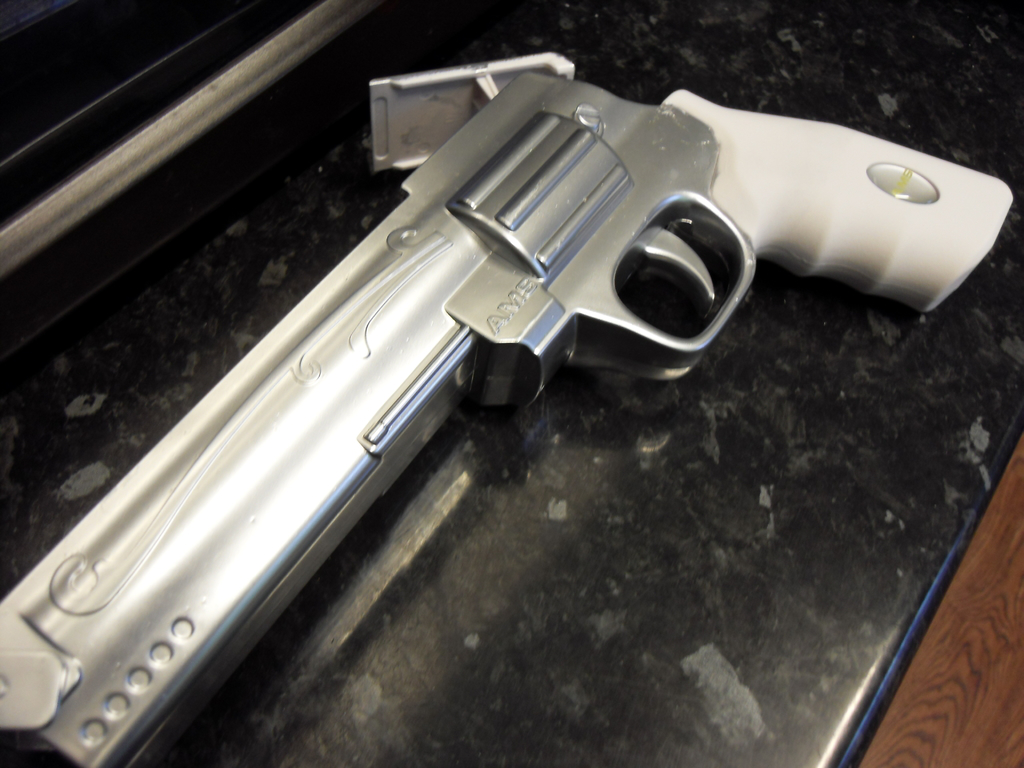

In [ ]:
img1

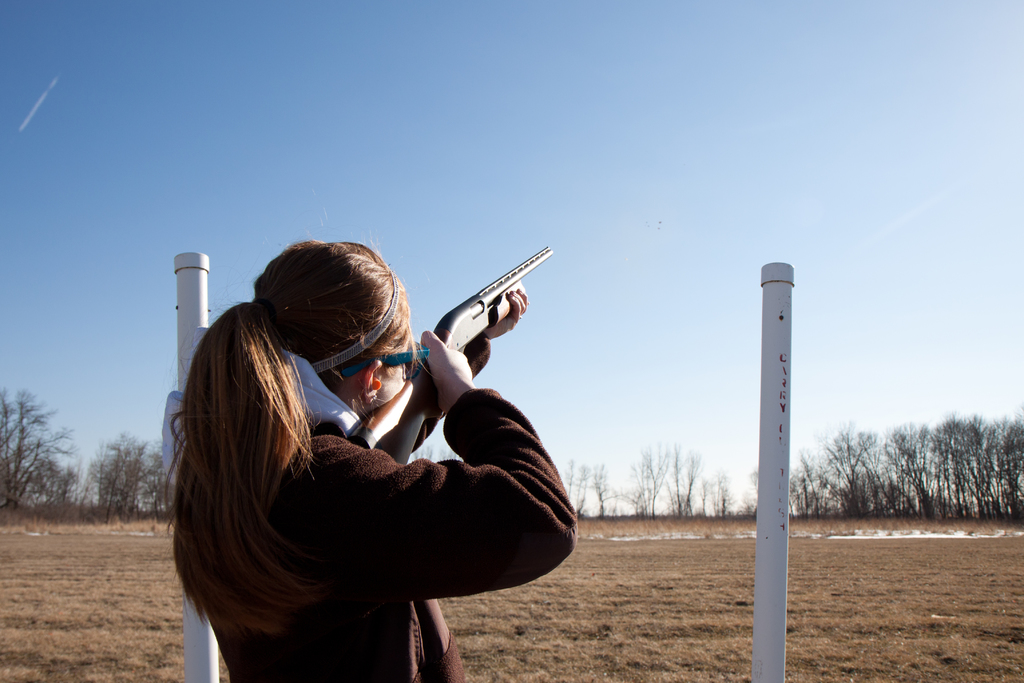

In [ ]:
img2

In [ ]:
transform = transforms.Compose([
    transforms.Resize([300, 300]),
    transforms.PILToTensor(),
])
img_tensor1 = transform(img1).to(torch.float32)
img_tensor2 = transform(img2).to(torch.float32)

In [ ]:
print(img_tensor1.shape)
print(img_tensor2.shape)
import tensorflow as tf
import numpy as np

torch.Size([3, 300, 300])
torch.Size([3, 300, 300])


In [ ]:
# img1
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_tensor1)}
print(ort_inputs['input.1'].shape)
a = tf.expand_dims(ort_inputs['input.1'],0)
a = a.numpy()[:, ::-1, :, :]
print(a.shape)
dic = {'input.1': a}
ort_outs = ort_session.run(None, dic)
img_out_y = np.asarray(ort_outs[0])
img_out_y

(3, 300, 300)
(1, 3, 300, 300)


array([[[9.8373562e-01, 1.8675651e-03, 5.6209933e-04, ...,
         2.1981959e-04, 2.5410135e-04, 3.4055157e-04],
        [9.8649132e-01, 1.5578741e-03, 7.6791464e-04, ...,
         3.1821951e-04, 3.5016285e-04, 3.3512770e-04],
        [9.7940695e-01, 1.8121742e-03, 5.9075735e-04, ...,
         1.6109881e-04, 2.1235029e-04, 3.4470187e-04],
        ...,
        [9.8395467e-01, 4.5312809e-05, 2.1284107e-04, ...,
         6.3278335e-06, 1.3067063e-02, 1.1936802e-05],
        [9.7889382e-01, 5.0113427e-05, 2.3433333e-04, ...,
         8.8035258e-06, 1.8340418e-02, 1.0738886e-05],
        [9.8150587e-01, 5.2484738e-05, 2.4870812e-04, ...,
         5.3847948e-06, 1.4014723e-02, 1.4888014e-05]]], dtype=float32)

In [ ]:
# img2
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(img_tensor2)}
print(ort_inputs['input.1'].shape)
a = tf.expand_dims(ort_inputs['input.1'],0)
a = a.numpy()[:, ::-1, :, :]
print(a.shape)
dic = {'input.1': a}
ort_outs = ort_session.run(None, dic)
img_out_y = np.asarray(ort_outs[0])
img_out_y

(3, 300, 300)
(1, 3, 300, 300)


array([[[9.7498828e-01, 5.7260896e-04, 2.7460430e-04, ...,
         7.0613867e-04, 3.7444010e-04, 7.5511872e-03],
        [9.8656416e-01, 3.4267755e-04, 1.9835323e-04, ...,
         6.0023024e-04, 3.1547414e-04, 2.8416540e-03],
        [9.7375429e-01, 6.1156304e-04, 2.6927554e-04, ...,
         5.9367786e-04, 3.9317628e-04, 6.4331065e-03],
        ...,
        [9.6464068e-01, 6.2340556e-04, 7.2933595e-05, ...,
         3.1931744e-05, 1.0535216e-02, 6.3771132e-04],
        [9.5034504e-01, 8.5672073e-04, 1.1177037e-04, ...,
         4.0310500e-05, 1.7384736e-02, 5.9728598e-04],
        [9.6529996e-01, 6.4643315e-04, 8.9292749e-05, ...,
         2.9791358e-05, 1.1935367e-02, 7.6290139e-04]]], dtype=float32)

In [ ]:
!git clone https://github.com/onnx/tutorials.git

Cloning into 'tutorials'...
remote: Enumerating objects: 748, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 748 (delta 63), reused 119 (delta 40), pack-reused 589
Receiving objects: 100% (748/748), 38.78 MiB | 19.89 MiB/s, done.
Resolving deltas: 100% (335/335), done.


In [ ]:
%cd "/content/pytorch-ssd/tutorials/tutorials/assets"
import sys
sys.path.append('/content/pytorch-ssd/tutorials/tutorials/assets/predict_pb2')

/content/pytorch-ssd/tutorials/tutorials/assets


#### 8. Parse images

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
# Parse response message
response_message = predict_pb2.PredictResponse()
response_message.ParseFromString(response.content)

# For your model, the outputs names should be something else customized by yourself. Use Netron to find out the outputs names.
bboxes = np.frombuffer(response_message.outputs['bboxes'].raw_data, dtype=np.float32)
labels = np.frombuffer(response_message.outputs['labels'].raw_data, dtype=np.int64)
scores = np.frombuffer(response_message.outputs['scores'].raw_data, dtype=np.float32)

print('Boxes shape:', response_message.outputs['bboxes'].dims)
print('Labels shape:', response_message.outputs['labels'].dims)
print('Scores shape:', response_message.outputs['scores'].dims)


In [ ]:
## Display image with bounding boxes and appropriate class
# Parse the list of class labels
classes = [line.rstrip('\n') for line in open('assets/coco_classes.txt')]

# Plot the bounding boxes on the image
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

resized_width = 1200
resized_height = 1200
num_boxes = 6 # we limit displaying to just 10 boxes to avoid clogging the result image with boxes
# The results are already sorted based on box confidences, so we just pick top N boxes without sorting

for c in range(num_boxes):
    base_index = c * 4
    y1, x1, y2, x2 = bboxes[base_index] * resized_height, bboxes[base_index + 1] * resized_width, bboxes[base_index + 2] * resized_height, bboxes[base_index + 3] * resized_width
    color = 'blue'
    box_h = (y2 - y1)
    box_w = (x2 - x1)
    bbox = patches.Rectangle((y1, x1), box_h, box_w, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(bbox)
    plt.text(y1, x1, s=classes[labels[c] - 1], color='white', verticalalignment='top', bbox={'color': color, 'pad': 0})
plt.axis('off')
plt.tight_layout()

plt.savefig("output/ssd_result.jpg", bbox_inches='tight', pad_inches=0.0)
plt.show()

## Problem 6 - Deep Reinforcement Learning

1.
Episodic tasks have clear endpoints, after which the environment resets. Each episode is independent of others. For example, a uber car ride ends with a customer leaving the car, then restarts. \
Continuous tasks have no natural ending points. The agent's experience is ongoing and does not reset. An example is temperature regulation in a building, where the system continually adjusts the settings based on environmental changes, with no specific endpoint before the system is shut down or reset.


2.
In reinforcement learning (RL), exploration involves trying various actions to discover new strategies, while exploitation means using known strategies to maximize rewards. The ϵ-greedy policy selects random actions (exploration) with probability ϵ and the best-known actions (exploitation) with probability 1-ϵ. Typically, ϵ is scheduled to decrease over time during Deep RL training, starting high to explore broadly and then decreasing to focus on exploiting the best strategies learned. This balance ensures that the agent doesn't get trapped in suboptimal solutions early on and refines its strategy as it gains more experience, optimizing both short-term and long-term outcomes.


3.
Deep Q-Learning modifies the standard Q-learning algorithm by integrating deep neural networks, called Q-networks, to approximate the action-value function. This method uses experiences to efficiently learn complex mappings of states to actions directly from high-dimensional sensory inputs like images.
- **Initialize Replay Memory D**: Store experiences to break correlation between sequential observations.
- **Initialize Q-network**: Set up the network with random weights.
- **For each episode**:
   - **Set Initial State**: Start the environment.
   - **For each time step**:
     - **Act**: Choose an action using the ϵ-greedy policy.
     - **Store Transition**: Save the current state, action, reward, and next state in D.
     - **Sample Mini-batch**: Randomly pick transitions from D.
     - **Calculate Target**: For each sample, compute the target Q-value using the Bellman equation.
     - **Update Network**: Adjust the network weights to minimize the loss between the predicted and target Q-values.


4.
Using a target Q-network in Deep Q-Learning stabilizes learning by keeping the target values for updating the main Q-network fixed for a period. This separation prevents the rapid shifts in Q-values that can occur when the target and prediction networks are the same, reducing oscillations and divergence during training.


5.
Experience replay in Q-learning enhances efficiency by breaking correlations between consecutive samples. It randomly samples past experiences, allowing the algorithm to learn from a diverse set of scenarios. This reuse of past data improves learning stability and ensures more uniform coverage of the state and action space, making learning more effective.


6.
Prioritized experience replay is a technique that modifies the standard experience replay in reinforcement learning by more frequently replaying experiences that are considered more valuable for learning. The priority of an experience is typically calculated based on the magnitude of its temporal-difference (TD) error, |$\delta$|. Experiences with higher TD errors suggest significant discrepancies between expected and actual outcomes, indicating that the agent has much to learn from these experiences. These prioritized experiences are sampled more frequently to accelerate learning.


7.
**Similarities**:
1. **Distributed Learning**: Both GORILA and Ape-X utilize distributed architectures to parallelize the learning process across multiple machines, enhancing learning efficiency.
2. **Experience Replay**: Both architectures employ experience replay mechanisms, where transitions are stored and later replayed to break correlation in observation sequences and improve learning stability.
3. **Scalability**: They are designed to scale efficiently by utilizing multiple actors (or agents) to interact with environments in parallel, increasing data collection and processing capabilities.
**Differences**:
1. **Parameter Synchronization**: GORILA uses a central parameter server for synchronizing network parameters, whereas Ape-X employs a distributed database to store and prioritize experiences.
2. **Prioritization Method**: Ape-X prioritizes experiences based on TD-error for sampling, focusing on more "surprising" experiences, whereas GORILA does not inherently include a prioritization scheme in its original form.
3. **Actor-Learner Separation**: Ape-X clearly separates actors and learners where actors only collect data and learners compute gradients; in GORILA, actors can also learn and update their local models independently.


## Problem 7 - ML Cloud Platforms

#### IBM

1. **DL framework:**
   IBM Machine Learning platform offers two approaches: Watson Studio and AutoAI. It supports a wide range of DL frameworks including TensorFlow, Keras, scikit-learn, XGBoost, PyTorch, Spark 3.0, PMML 3.0-4.3, Hybrid/AutoAI 0.1, and SPSS 18.218.117.1.

2. **Compute units:**
   IBM Cloud supports GPU for accelerated computing.

3. **Model lifecycle management:**
   IBM offers CPDCTL, a command-line interface (CLI), to manage the lifecycle of IBM Cloud Pak for Data, facilitating efficient management of ML models from development to deployment.

4. **Monitoring:**
   IBM Watson OpenScale is a tool for tracking and measuring outcomes from AI models, ensuring fairness and explainability regardless of where the models were built. It helps in correcting accuracy drift in production AI models. For example, it facilitates adjusting the settings for payload logging and model deployment.

5. **Visualization:**
   IBM Watson Studio provides visualization tools such as IBM SPSS Modeler and IBM Data Refinery, available on both IBM Cloud and IBM Cloud Pak for Data, to visualize performance metrics during training and throughout the ML lifecycle.

6. **Training process:**
   The training process in IBM Watson Studio involves steps like selecting a deployment, providing model details, specifying model input (data type and algorithm type), selecting training data, configuring model transaction, defining training data labels and features, and specifying model output details. This process ensures comprehensive training job description and management.

   Reference: https://www.ibm.com/docs/en/cloud-paks/cp-data/4.0?topic=specifications-supported-deployment-frameworks

#### Google

1. **DL framework:**
   Google Cloud offers support for TensorFlow, scikit-learn, XGBoost, and Keras. With the introduction of Google AI Platform (Unified), various ML tools including AI Platform (Classic), AutoML, frameworks, and APIs are unified under AI Platform Unified, providing a comprehensive ML platform.

2. **Compute units:**
   Google Cloud provides support for various compute units including CPU, GPU, and TPU (Tensor Processing Unit), catering to different computational needs and performance requirements.

3. **Model lifecycle:**
   Google Cloud offers efficient management of models, jobs, and endpoints through dedicated REST APIs, the gcloud command line interface, or the user-friendly Google Cloud Console, providing flexibility in managing the ML lifecycle.

4. **Monitoring:**
   Monitoring of training jobs is facilitated through the AI Platform Training Jobs on the Cloud Console, enabling customers to track and monitor the progress of their training jobs in real-time.

5. **Visualization:**
   Google Cloud provides TensorBoard, a powerful visualization tool for machine learning experimentation. TensorBoard allows users to visualize and analyze various aspects of their models, including:
   - Projecting embeddings to a lower dimensional space
   - Displaying images, text, and audio data
   - Tracking and visualizing metrics such as loss and accuracy
   - Visualizing the model graph (ops and layers)
   - Viewing histograms of weights, biases, or other tensors as they change over time

6. **Training process:**
   The process of developing a production-ready model on Google Cloud involves several steps:
   - Source and prepare your data.
   - Develop your model.
   - Train an ML model on your data, including evaluating model accuracy and tuning hyperparameters.
   - Deploy your trained model for inference, supporting both online and batch prediction.
   - Monitor the predictions on an ongoing basis for performance and accuracy.
   - Manage your models and model versions efficiently through Google Cloud services, ensuring seamless model lifecycle management.



#### Microsoft

1. **DL framework:**
   Microsoft's Azure AI platform, particularly Azure Machine Learning, serves as the primary environment for dataset management, model training, and deployment. It offers integration with Jupyter notebooks and provides ONNX Runtime for accelerating ML models across various operating systems and hardware platforms. Azure supports popular DL frameworks including TensorFlow, scikit-learn, PyTorch, Microsoft Cognitive Toolkit, and Spark ML.

2. **Compute units:**
   Azure provides support for Linux OS and GPU computing units, offering flexibility and performance for ML workloads.

3. **Model lifecycle Management:**
   Microsoft offers comprehensive MLOps tooling for managing, deploying, and monitoring ML models within automated pipelines. This ensures efficient management of the entire ML lifecycle, from development to deployment and beyond.

4. **Monitoring:**
   Microsoft Azure provides robust monitoring capabilities for ML models, including:
   - Tracking, logging, and analyzing data, models, and resources.
   - Detecting data drift and maintaining model accuracy.
   - Error analysis for debugging models and optimizing accuracy.
   - Audit trails to trace ML artifacts for compliance.
   - Application of built-in and custom policies for compliance management.
   - Continuous monitoring with Azure Security Center for enhanced security.
   - Quota management and automatic shutdown features for controlling costs.

5. **Visualization:**
   Azure offers visualization tools that facilitate understanding and visualizing each step within the ML workflow, providing support for newcomers and enabling effective communication of insights.

6. **Training process:**
   Azure provides a range of options for model training, from no-code to low-code approaches. Automated ML complements Azure ML Studio with a high degree of automation for routine tasks, including data exploration, model customization, and deployment. Azure supports various ML tasks such as regression, classification, and time-series forecasting, catering to diverse business needs.

#### Amazon

1. Amazon offers two major products for machine learning:
   - **Amazon Machine Learning (Amazon ML):** Although no longer updated after 2010, it provides prediction capabilities for binary classification, regression, and multiclass classification tasks.
   - **Amazon SageMaker:** A comprehensive ML service that supports various DL frameworks including TensorFlow, MXNet, Keras, Gluon, PyTorch, Caffe2, Chainer, and Torch. SageMaker utilizes MLOps framework to build and manage ML infrastructure, offering features such as automated alert triggering for data drift and anomalies.

   **DL framework support:**
   Amazon SageMaker supports a wide range of DL frameworks for building and deploying ML models.

2. **Compute units:**
   Amazon provides GPU type compute units, offering enhanced computational power for ML workloads.

3. **Model lifecycle:**
   Amazon SageMaker supports comprehensive model lifecycle management, enabling users to efficiently manage models from development to deployment and monitoring, ensuring seamless integration into production environments.

4. **Monitoring:**
   Amazon employs NVIDIA System Management Interface (nvidia-smi), a command-line utility, for monitoring GPU-enabled instances. Users can query information about GPU utilization, memory consumption, fan usage, power consumption, and temperature of their NVIDIA GPU devices using nvidia-smi.

5. **Visualization:**
   Users can analyze data using Monitoring Schedules in Amazon SageMaker, with functionalities such as `DefaultMonitor.create_monitoring_schedule()` and `show_distribution()` for visualization. Additionally, TensorBoard can be utilized for visualizing TensorFlow training jobs, enhancing the understanding of model performance and training dynamics.

6. **Training process:**
   The training process in Amazon SageMaker involves providing data transformation instructions, specifying the input training data source, defining the target attribute for prediction, and configuring training parameters to control the learning algorithm, ensuring a streamlined training workflow.

